# Exploration of adding noise to observations (or not) when using the Iterative Ensemble Smoother (iES)

In [1]:
from wvn_helper import plot_mod_obs

Without observation noise, we hope that the modeled output distribution will overlap (or "cover") the single observation value.

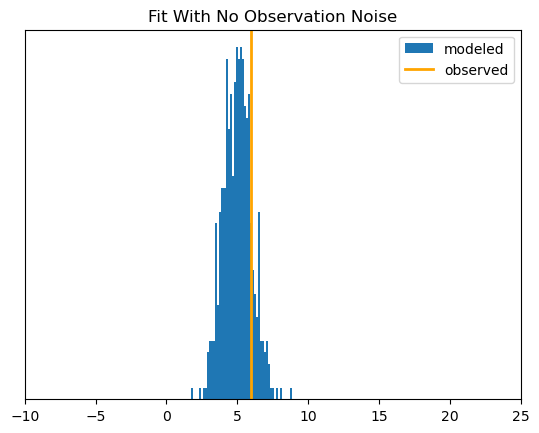

In [2]:
plot_mod_obs(6)

If the modeled output distribution does _not_ overlap the observed value, that observation is in "prior data conflict".

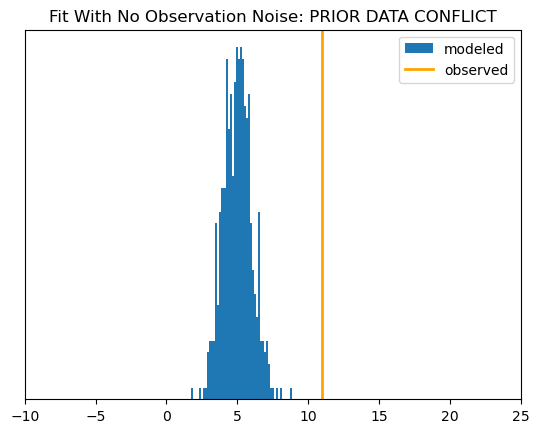

In [3]:
plot_mod_obs(11,pdc=True)

But what if we set an observation weight for the obs? 

Based on general background, we assume 
$\omega \approx \frac{1}{\sigma}$

So, sampling the noise around the observation results in 
$\sigma = \frac{1}{\omega}$

For example, if this is a head observation, 
$\sigma=0.5m$ is a reasonable starting point might be $\omega=\frac{1}{.5}=2.0$


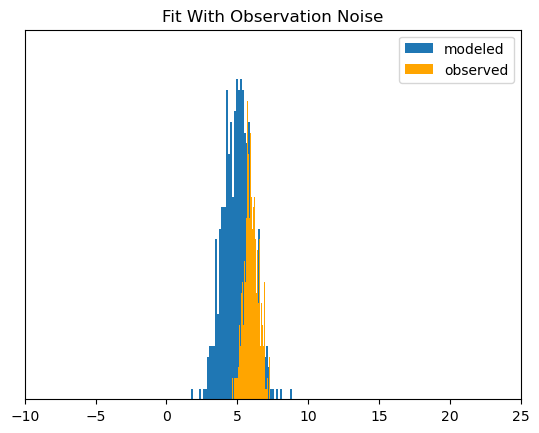

In [4]:
plot_mod_obs(6, noisy=True, std=.5)

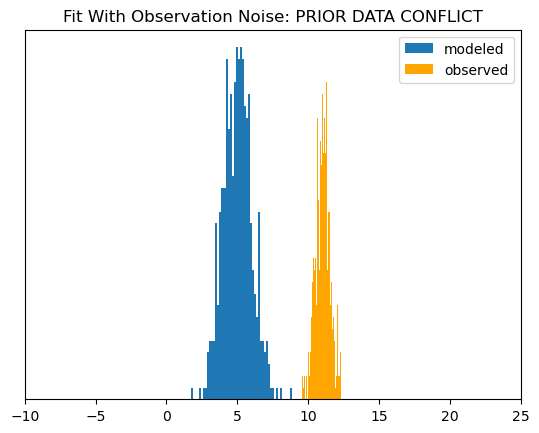

In [5]:
plot_mod_obs(11, noisy=True, std=.5, pdc=True)

That's all good, but what if we adjust weights to balance the objective function? This is a common approach and perfectly defensible, but say we decrease the weight on the heads quite a bit. is $\omega \approx \frac{1}{\sigma}$ still valid?

If we adjust $\omega$ to be $0.2$ then $\sigma = \frac{1}{\omega} = \frac{1}{0.2} = 5.0$

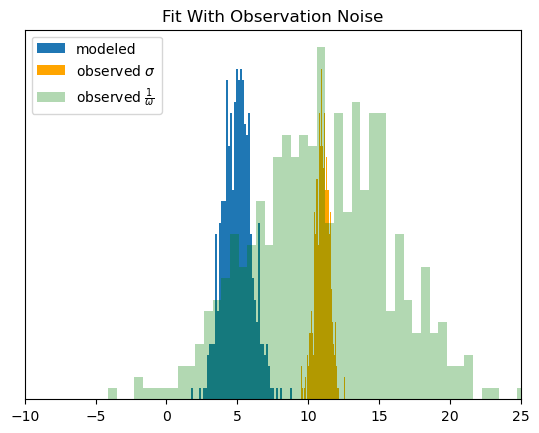

In [6]:
plot_mod_obs(11, noisy=True, std=[.5,5] )

So, there are pretty important implications in how we choose observation noise. This can make the difference between a realistic representation of the noise and an unrealistic (and really, uninformative) level of spread in the observation values. Further, this decision can make the difference between concluding that an observation is in prior-data-conflict or not. With many observations, the implications of this are very important.